In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('Data/home_insurance.csv')

In [4]:
data.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,...,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,...,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,...,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,...,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,...,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,...,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


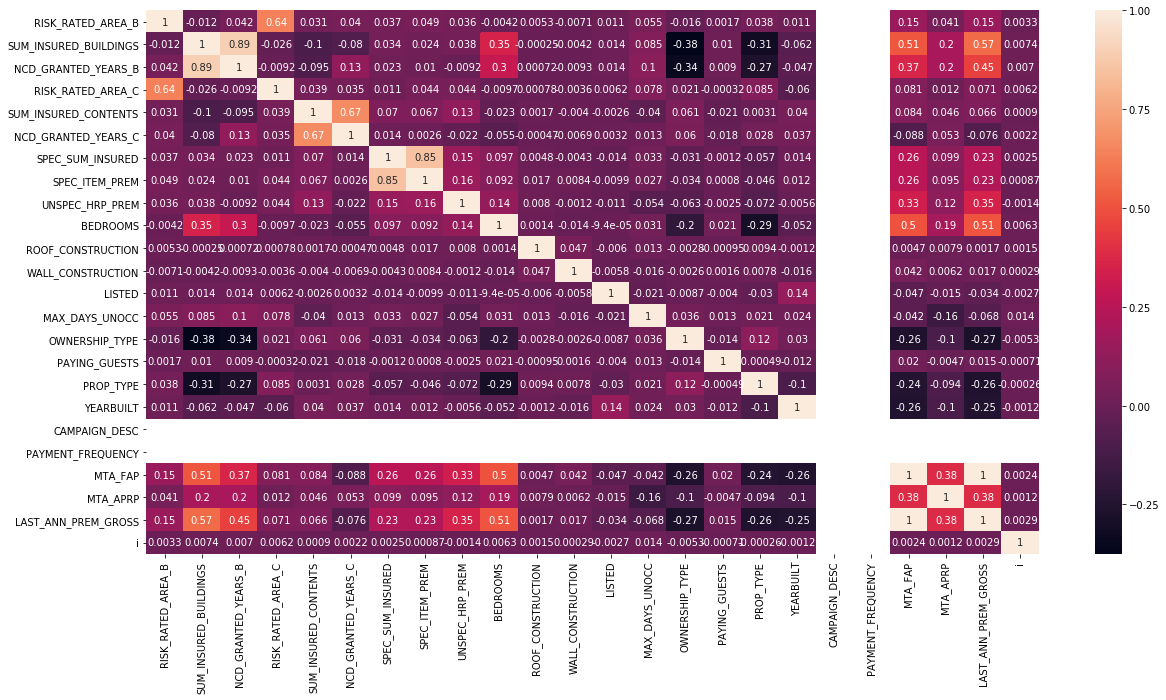

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [6]:
# Visualizing another dataset

data2 = pd.read_csv('Data/All State Purchase Data/train.csv')

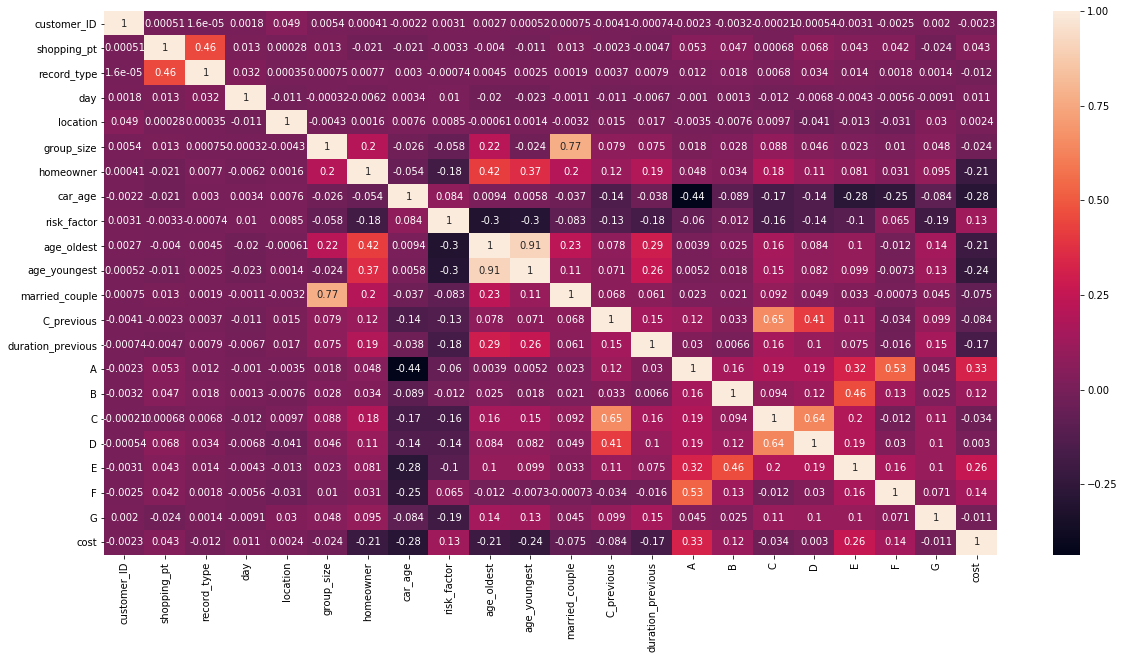

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(), annot=True)

In [10]:
data3 = pd.read_csv('Data/insurance_claims.csv')
data3.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


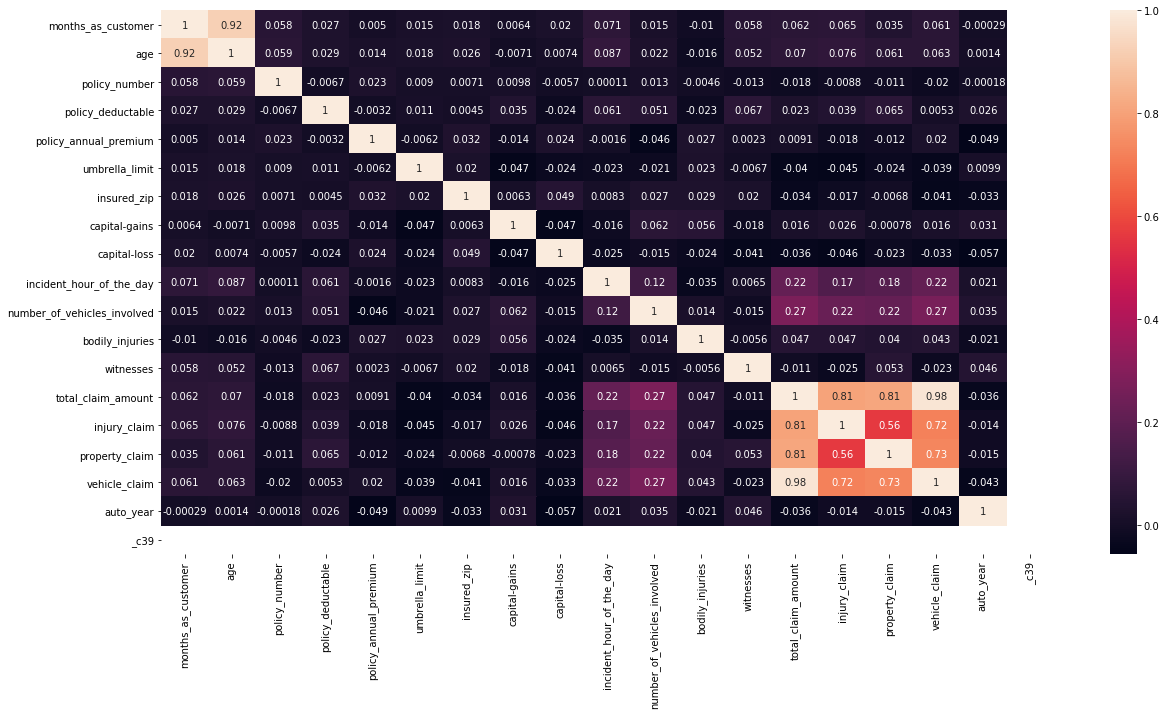

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data3.corr(), annot=True)

In [14]:
from sklearn.svm import SVC
from time import time 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [21]:
X = np.c_[data3['incident_hour_of_the_day'], data3['injury_claim'], data3['total_claim_amount']]
Y = np.c_[data3['total_claim_amount'], data3['injury_claim'], data3['property_claim'], data3['vehicle_claim']]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [26]:
model1 = LinearRegression()
t = time()
model1.fit(X_train, Y_train)
print(f'Time taken to train: {time() - t}')
pred = model1.predict(X_test)

print(pred)
print(Y_test)

Time taken to train: 0.015261173248291016
[[ 8.81100000e+04  1.60200000e+04  1.17884852e+04  6.03015148e+04]
 [ 5.28000000e+04  5.28000000e+03  7.89881803e+03  3.96211820e+04]
 [ 6.76000000e+04  1.35200000e+04  8.64583822e+03  4.54341618e+04]
 [ 6.28000000e+04  6.28000000e+03  9.52961360e+03  4.69903864e+04]
 [ 6.82000000e+03  6.20000000e+02  5.95965924e+02  5.60403408e+03]
 [ 6.93000000e+04  1.38600000e+04  8.88950366e+03  4.65504963e+04]
 [ 7.28400000e+04  1.21400000e+04  1.00001192e+04  5.06998808e+04]
 [ 5.37300000e+04  1.19400000e+04  6.50466114e+03  3.52853389e+04]
 [ 4.89500000e+04  8.90000000e+03  6.31727719e+03  3.37327228e+04]
 [ 3.69000000e+03  4.10000000e+02  5.72208200e+01  3.22277918e+03]
 [ 4.68000000e+03  5.20000000e+02  2.38194209e+02  3.92180579e+03]
 [ 8.94000000e+04  1.49000000e+04  1.23140387e+04  6.21859613e+04]
 [ 5.49000000e+03  2.74847962e-12  4.92445554e+02  4.99755445e+03]
 [ 4.91000000e+04  9.82000000e+03  6.12648841e+03  3.31535116e+04]
 [ 6.82400000e+04  8